Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Reading data

In [2]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')
terrorism_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN


To view shape of dataset

In [3]:
print("There are {} rows and {} columns in the dataset".format(terrorism_df.shape[0],terrorism_df.shape[1]))

There are 106944 rows and 135 columns in the dataset


In [4]:
terrorism_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Checking uniqueness of columns of dataset

In [5]:
No_of_cols=terrorism_df.columns.nunique()
print("There are total %d columns in the data"%No_of_cols)

There are total 135 columns in the data


Renaming columns which we are going to use for our analysis

In [6]:
terrorism_df=terrorism_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [7]:
terrorism_df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1.0,1.0,NaN


selecting only those cols that are required

In [8]:
terrorism_df=terrorism_df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype',
                           'Gang_name','Weapon_type']]

In [9]:
terrorism_df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary


 Checking the updated shape of the dataset

In [10]:
terrorism_df.shape

(106944, 12)

Checking for null values

In [11]:
terrorism_df.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              419
City               434
Attack_type          0
Target_type          0
Target_subtype    5218
Gang_name            0
Weapon_type          0
dtype: int64

finding nan values

In [12]:
terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

In [13]:
terrorism_df['State']=terrorism_df['State'].fillna('Unknown')

In [14]:
terrorism_df['City']=terrorism_df['City'].fillna('Unknown')
terrorism_df.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)
terrorism_df

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...
106939,2012,4,10,Nigeria,Sub-Saharan Africa,Borno,Banki,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Boko Haram,Explosives
106940,2012,4,10,Nigeria,Sub-Saharan Africa,Borno,Banki,Armed Assault,Government (General),Government Building/Facility/Office,Boko Haram,Firearms
106941,2012,4,10,Nigeria,Sub-Saharan Africa,Borno,Banki,Armed Assault,Government (General),Government Building/Facility/Office,Boko Haram,Firearms
106942,2012,4,10,Nigeria,Sub-Saharan Africa,Borno,Banki,Armed Assault,Private Citizens & Property,Marketplace/Plaza/Square,Boko Haram,Firearms


In [15]:
terrorism_df.shape

(106944, 12)

In [16]:
terrorism_df.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
dtype: int64

In [17]:
terrorism_df.head(10)

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary
5,1970,1,1,United States,North America,Illinois,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Black Nationalists,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,Assassination,Police,Police Security Forces/Officers,Tupamaros (Uruguay),Firearms
7,1970,1,2,United States,North America,California,Oakland,Bombing/Explosion,Utilities,Electricity,Unknown,Explosives
8,1970,1,2,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,New Year's Gang,Incendiary
9,1970,1,3,United States,North America,Wisconsin,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,New Year's Gang,Incendiary


In [18]:
terrorism_df.columns.unique()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Attack_type', 'Target_type', 'Target_subtype', 'Gang_name',
       'Weapon_type'],
      dtype='object')

In [19]:
terrorism_df.columns.nunique()

12

In [20]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


In [21]:
print(terrorism_df['Region'].unique())

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


In [22]:
print(terrorism_df['Attack_type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [23]:
print(terrorism_df['Target_type'].unique())

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']


In [24]:
print(terrorism_df['Gang_name'].unique())

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 "Communist Party of Nepal (People's War Group)"
 'Supporters of Ali Abdullah Saleh' 'Civilian Defense']


In [25]:
print(terrorism_df['Gang_name'].nunique())

2948


In [26]:
print(terrorism_df['Weapon_type'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment' 'Vehicle' 'Fake Weapons' 'Radiological' 'Other'
 'Biological']


In [27]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106944 entries, 0 to 106943
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Year            106944 non-null  int64 
 1   Month           106944 non-null  int64 
 2   Day             106944 non-null  int64 
 3   Country         106944 non-null  object
 4   Region          106944 non-null  object
 5   State           106944 non-null  object
 6   City            106944 non-null  object
 7   Attack_type     106944 non-null  object
 8   Target_type     106944 non-null  object
 9   Target_subtype  106944 non-null  object
 10  Gang_name       106944 non-null  object
 11  Weapon_type     106944 non-null  object
dtypes: int64(3), object(9)
memory usage: 9.8+ MB


In [28]:
terrorism_df.describe()

,Year,Month,Day
count,106944.000000,106944.000000,106944.000000
mean,1994.229999,6.400808,15.308975
std,11.189761,3.410345,8.822289
min,1970.000000,0.000000,0.000000
25%,1985.000000,3.000000,8.000000
50%,1992.000000,6.000000,15.000000
75%,2006.000000,9.000000,23.000000
max,2012.000000,12.000000,31.000000


In [29]:
terrorism_df['Country'].value_counts().head(10)

Iraq              8271
Colombia          7475
India             7057
Peru              6049
Pakistan          5939
El Salvador       5320
United Kingdom    4611
Philippines       3430
Afghanistan       3376
Spain             3231
Name: Country, dtype: int64

In [30]:
terrorism_df['Region'].value_counts().head(10)

Middle East & North Africa     21248
South Asia                     20826
South America                  17903
Western Europe                 15103
Central America & Caribbean    10317
Sub-Saharan Africa              7434
Southeast Asia                  6609
North America                   3127
Eastern Europe                  2940
East Asia                        698
Name: Region, dtype: int64

In [31]:
terrorism_df['State'].value_counts().head(10)

Unknown                  4247
Northern Ireland         3984
Baghdad                  3495
Lima                     2609
San Salvador             1923
Antioquia                1825
Sindh                    1782
Jammu and Kashmir        1631
Santiago Metropolitan    1620
Basque Country           1443
Name: State, dtype: int64

In [32]:
terrorism_df['Target_subtype'].value_counts().head(10)

Police Security Forces/Officers                         6799
Unnamed Civilian/Unspecified                            6287
Military Unit/Patrol/Convoy                             5506
others                                                  5218
Government Personnel (excluding police, military)       4468
Politician or Political Party Movement/Meeting/Rally    4350
Government Building/Facility/Office                     3789
Electricity                                             3442
Police Building (headquarters, station, school)         3226
Bank/Commerce                                           2963
Name: Target_subtype, dtype: int64

In [33]:
terrorism_df['City'].value_counts().head(10)

Unknown         6584
Baghdad         3494
Lima            2356
Belfast         1982
Santiago        1597
San Salvador    1558
Karachi         1553
Bogota           952
Istanbul         945
Beirut           896
Name: City, dtype: int64

In [34]:
terrorism_df['Attack_type'].value_counts().head(10)

Bombing/Explosion                      49170
Armed Assault                          25612
Assassination                          14634
Facility/Infrastructure Attack          6627
Hostage Taking (Kidnapping)             5676
Unknown                                 3466
Hostage Taking (Barricade Incident)      679
Unarmed Assault                          630
Hijacking                                450
Name: Attack_type, dtype: int64

In [35]:
terrorism_df['Target_type'].value_counts().head(10)

Private Citizens & Property       23941
Business                          15399
Government (General)              14650
Police                            12913
Military                          12650
Transportation                     5325
Utilities                          4564
Government (Diplomatic)            2889
Educational Institution            2711
Religious Figures/Institutions     2461
Name: Target_type, dtype: int64

In [36]:
terrorism_df['Gang_name'].value_counts().head(10)

Unknown                                             45677
Shining Path (SL)                                    4520
Farabundo Marti National Liberation Front (FMLN)     3351
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2065
Basque Fatherland and Freedom (ETA)                  2024
Taliban                                              1845
Liberation Tigers of Tamil Eelam (LTTE)              1606
Communist Party of India - Maoist (CPI-Maoist)       1427
New People's Army (NPA)                              1353
Name: Gang_name, dtype: int64

In [37]:
terrorism_df['Weapon_type'].value_counts().head(5)

Explosives    50135
Firearms      37412
Unknown        8839
Incendiary     7794
Melee          2273
Name: Weapon_type, dtype: int64

Visualizing the data

Attack by Weapon type

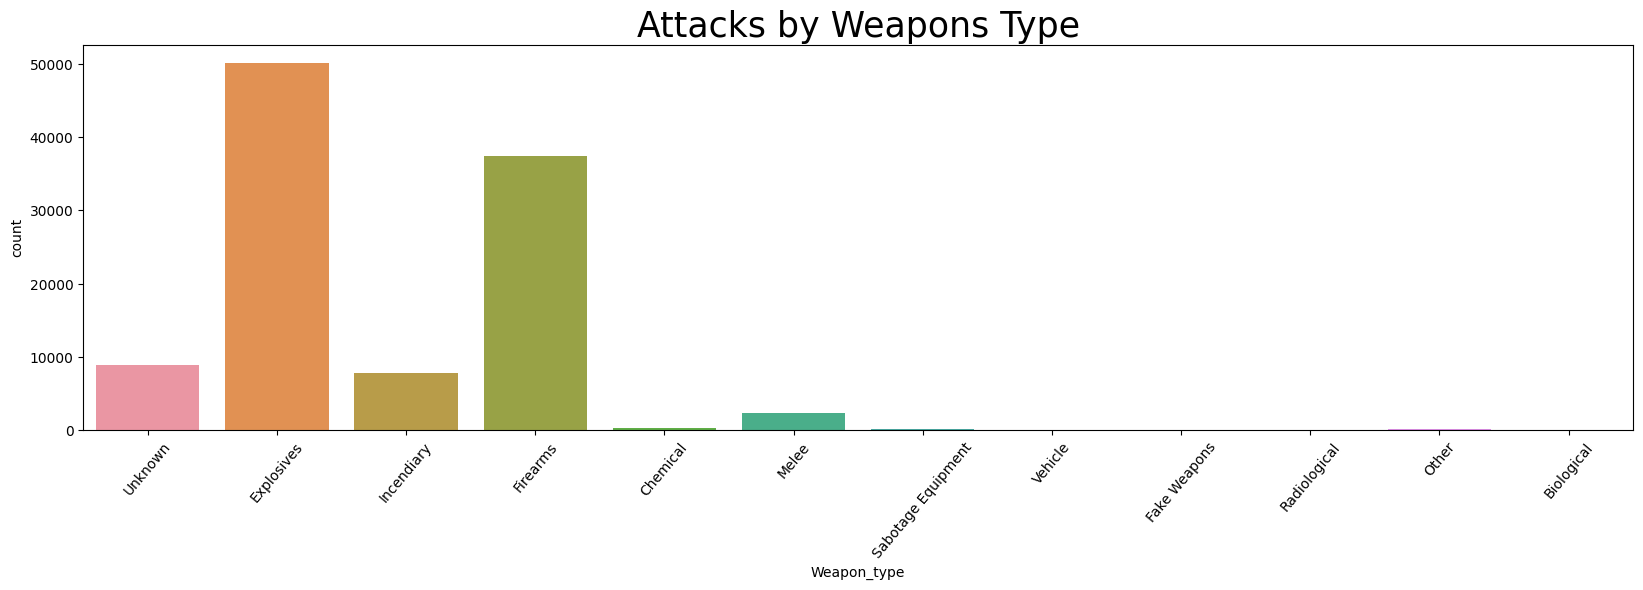

In [38]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 50)
plt.title('Attacks by Weapons Type', fontsize = 25)
sns.countplot(x=terrorism_df.Weapon_type);

Attack by year

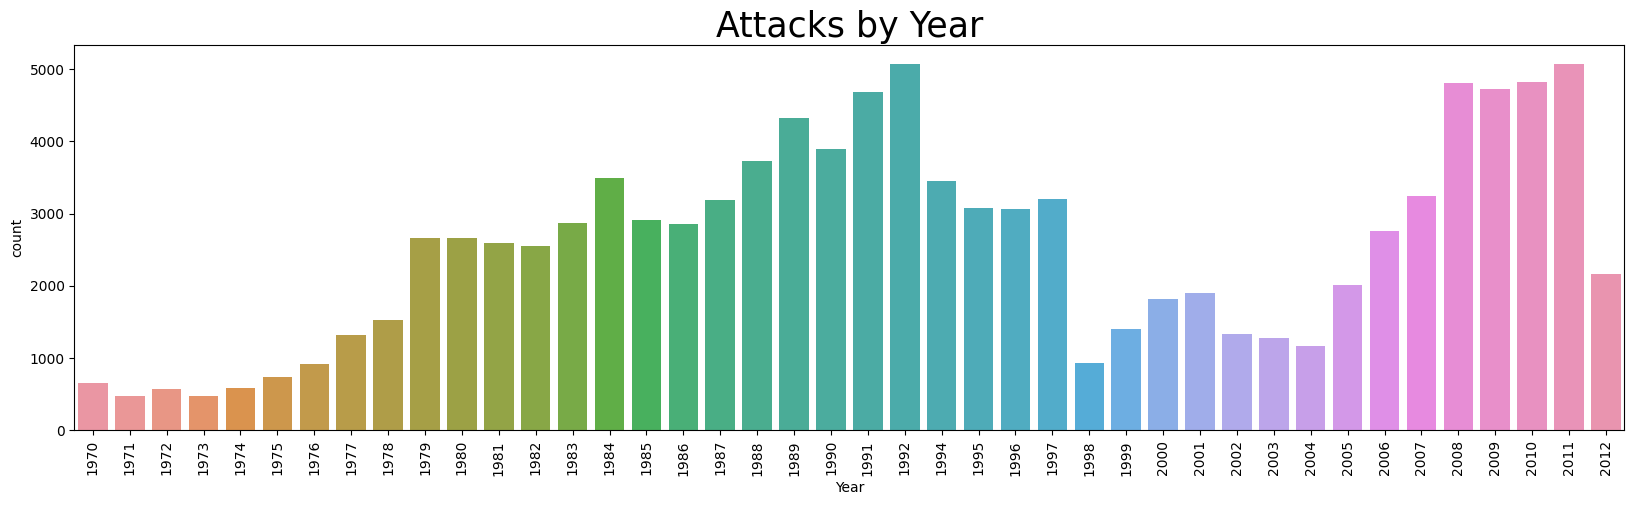

In [39]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year', fontsize = 25)
sns.countplot(x=terrorism_df.Year);

Attack by month

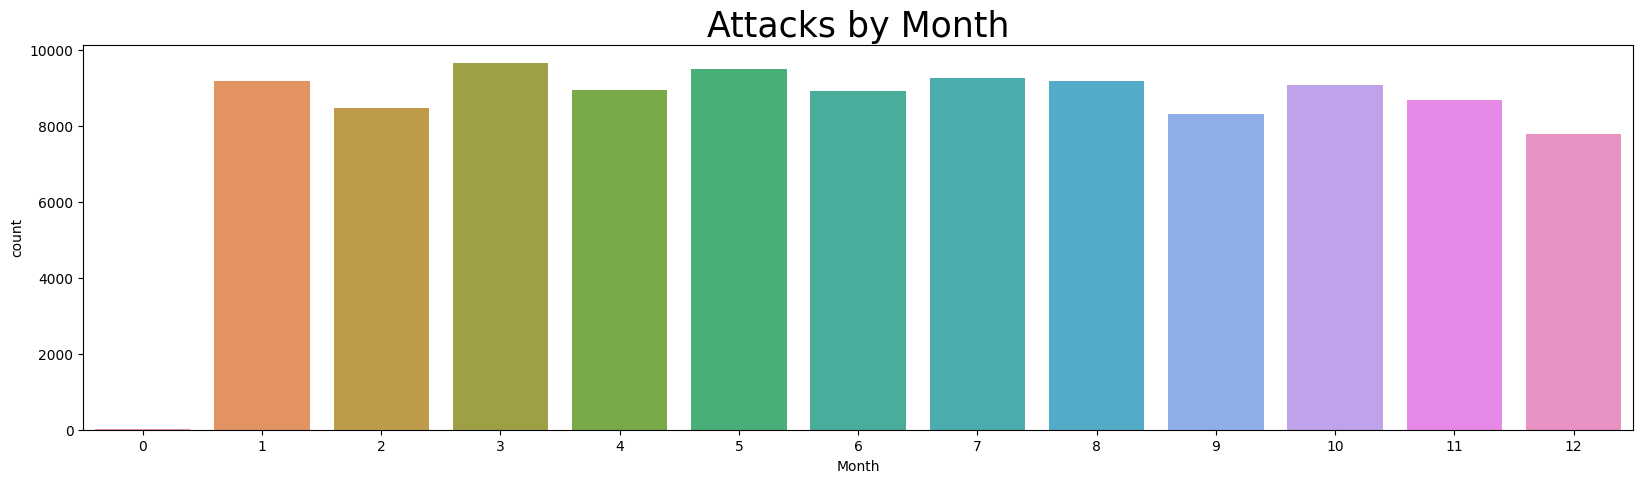

In [40]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month', fontsize = 25)
sns.countplot(x=terrorism_df.Month);

Attack by day

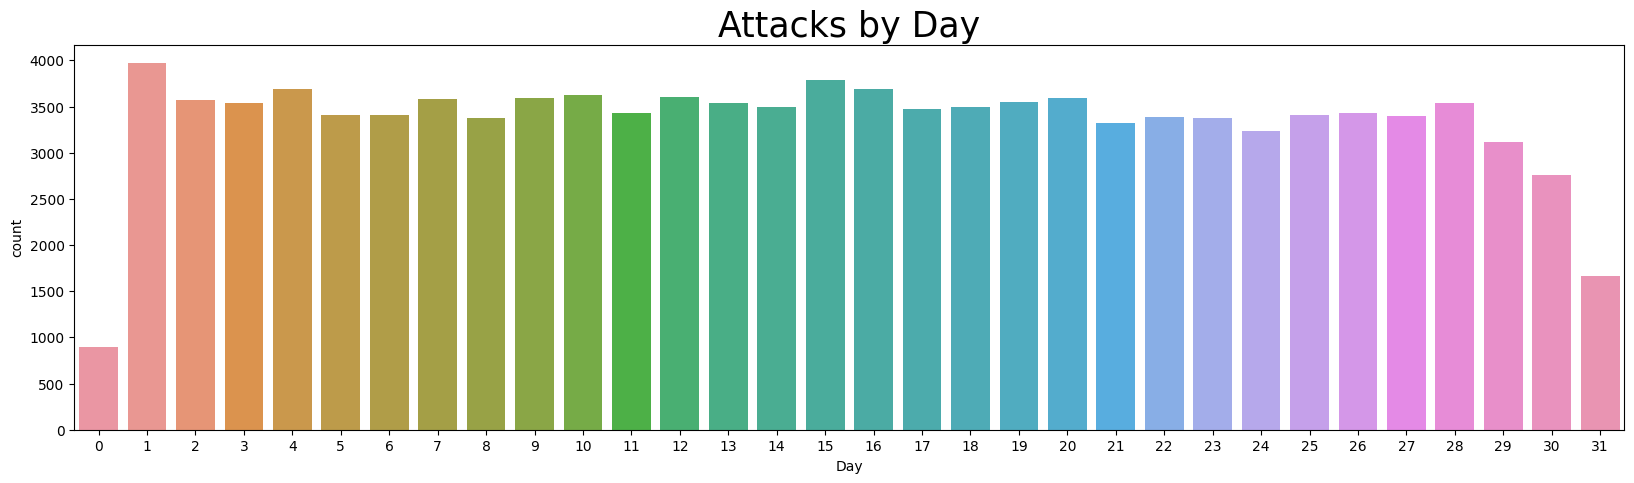

In [41]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Day', fontsize = 25)
sns.countplot(x=terrorism_df.Day);

Cities with most attacks

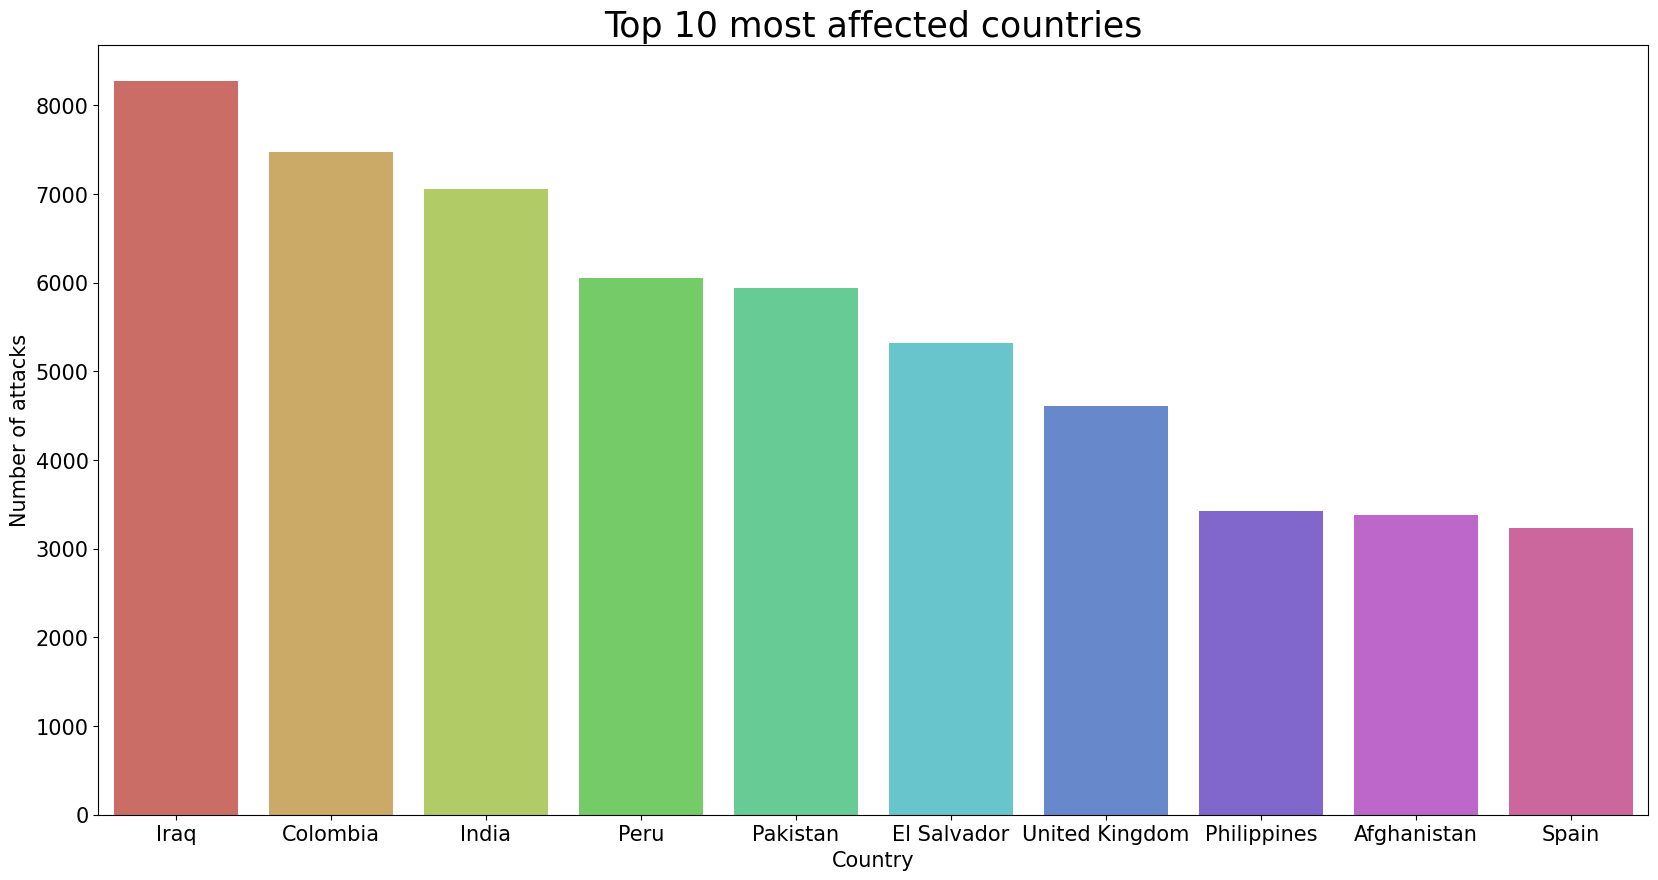

In [61]:
plt.subplots(figsize=(20,10))
sns.barplot(x=terrorism_df['Country'].value_counts()[:10].index,y=terrorism_df['Country'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected countries', fontsize =25)
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 0)
plt.show()

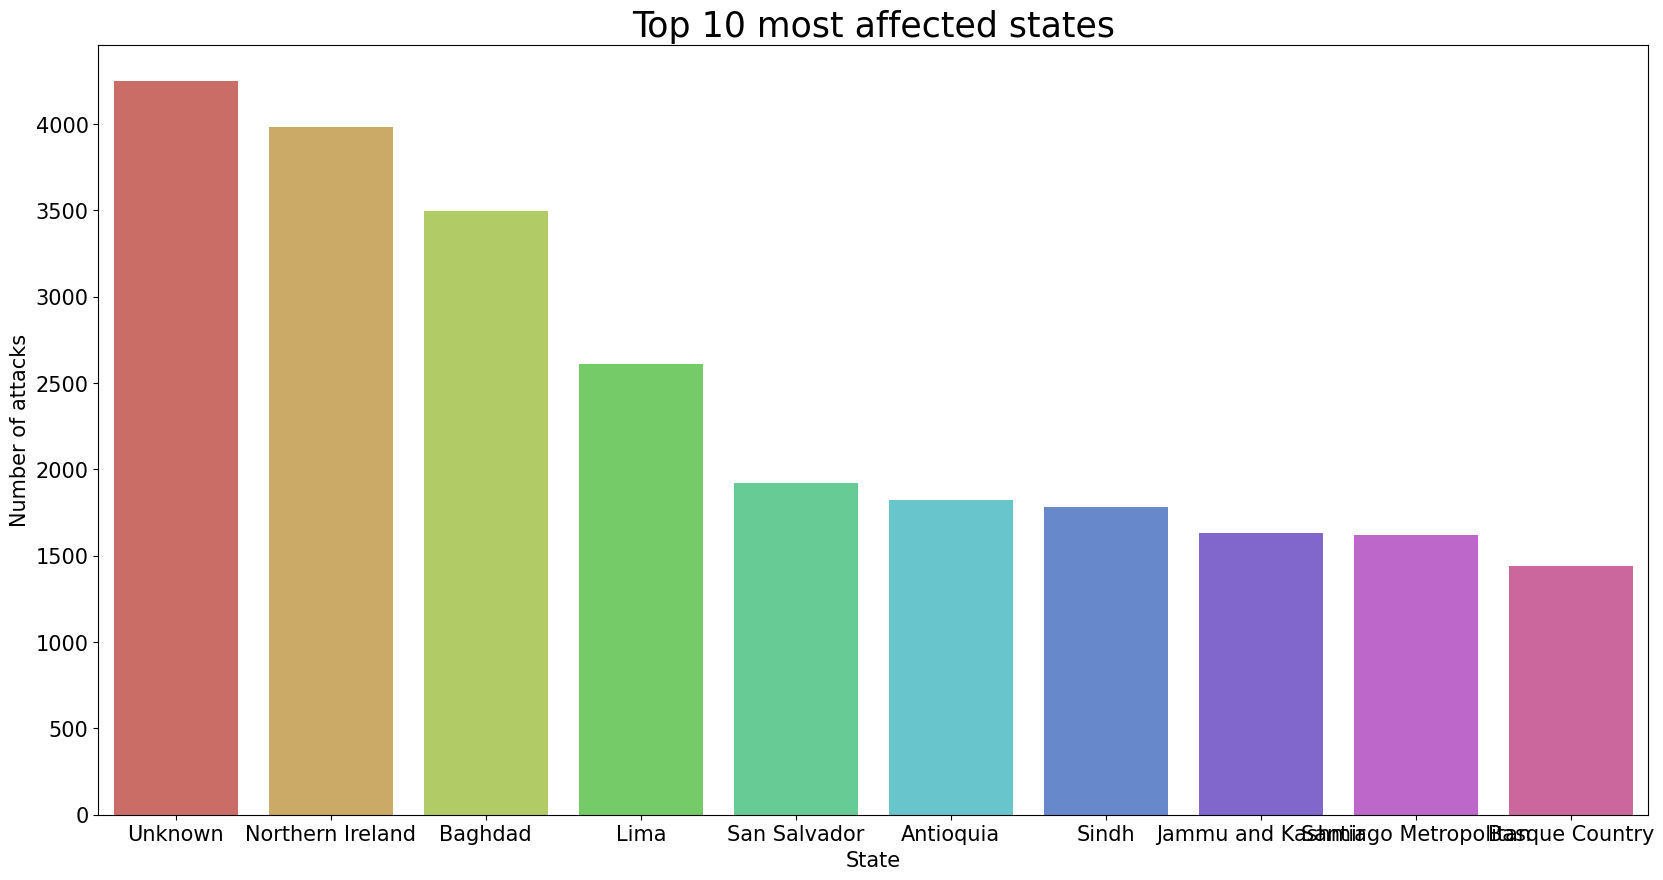

In [63]:
plt.subplots(figsize=(20,10))
sns.barplot(x=terrorism_df['State'].value_counts()[:10].index,y=terrorism_df['State'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected states', fontsize =25)
plt.xlabel('State')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 0)
plt.show()

Attack by Region

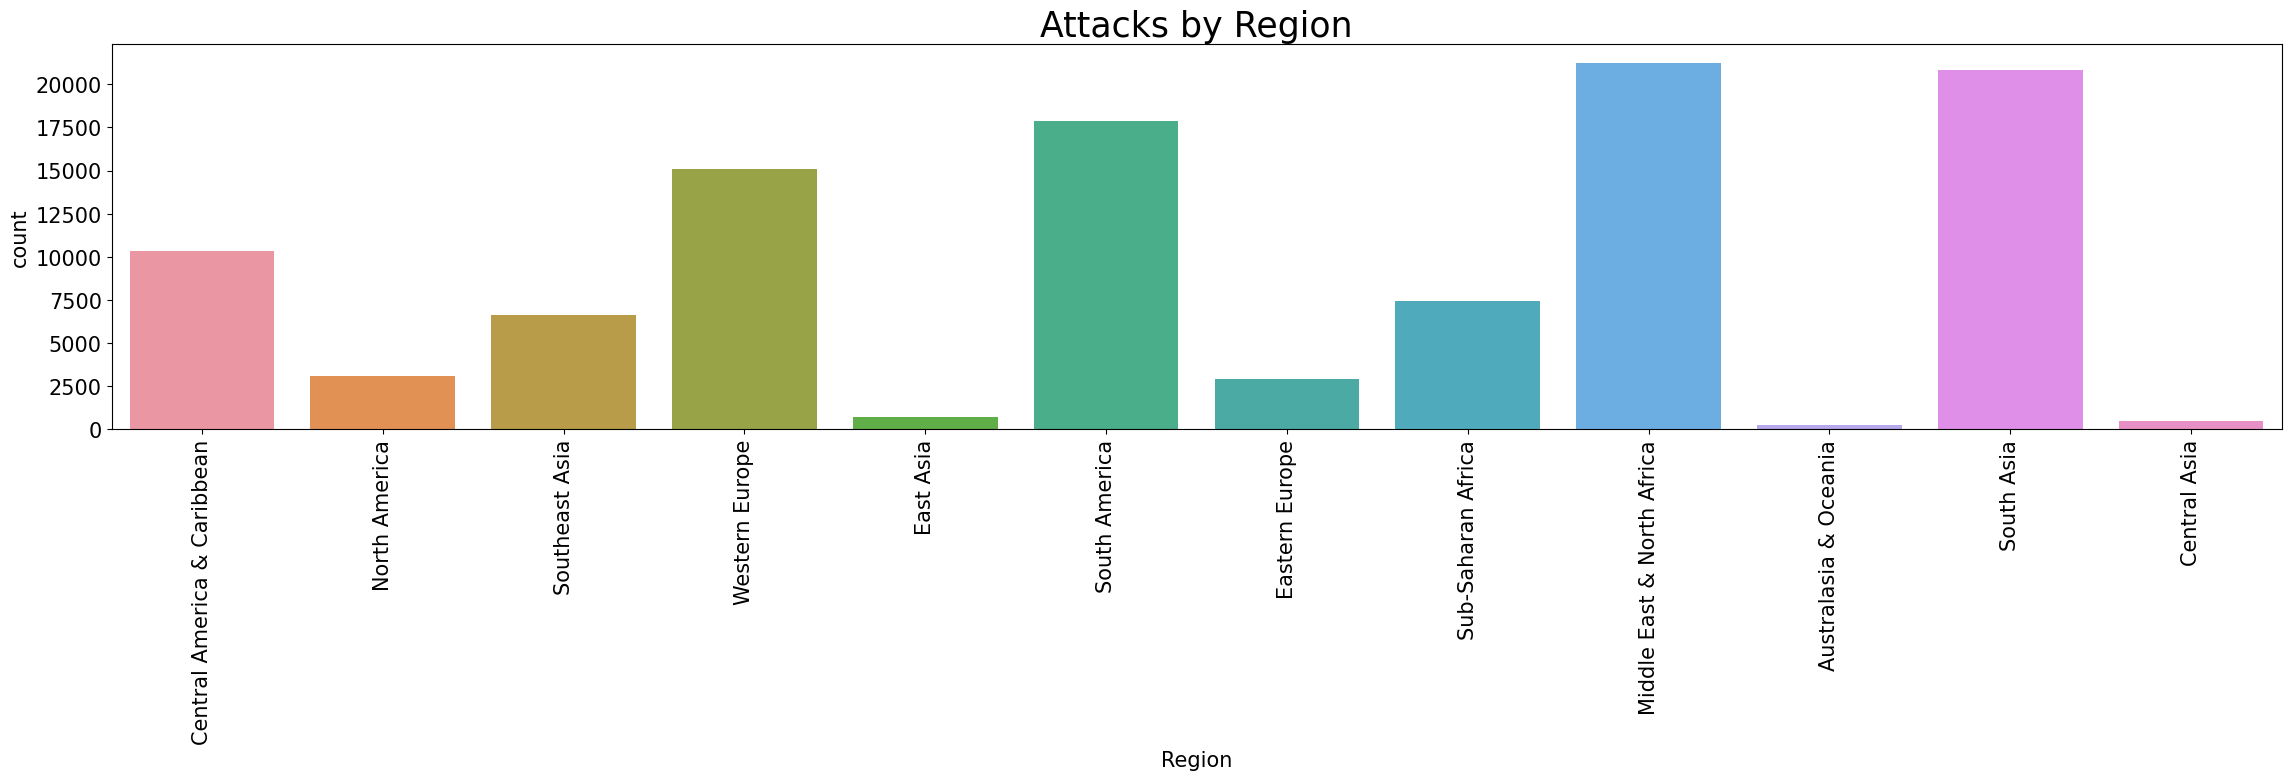

In [43]:
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Attacks by Region', fontsize =25)
sns.countplot(x=terrorism_df.Region);

Attack based on target type

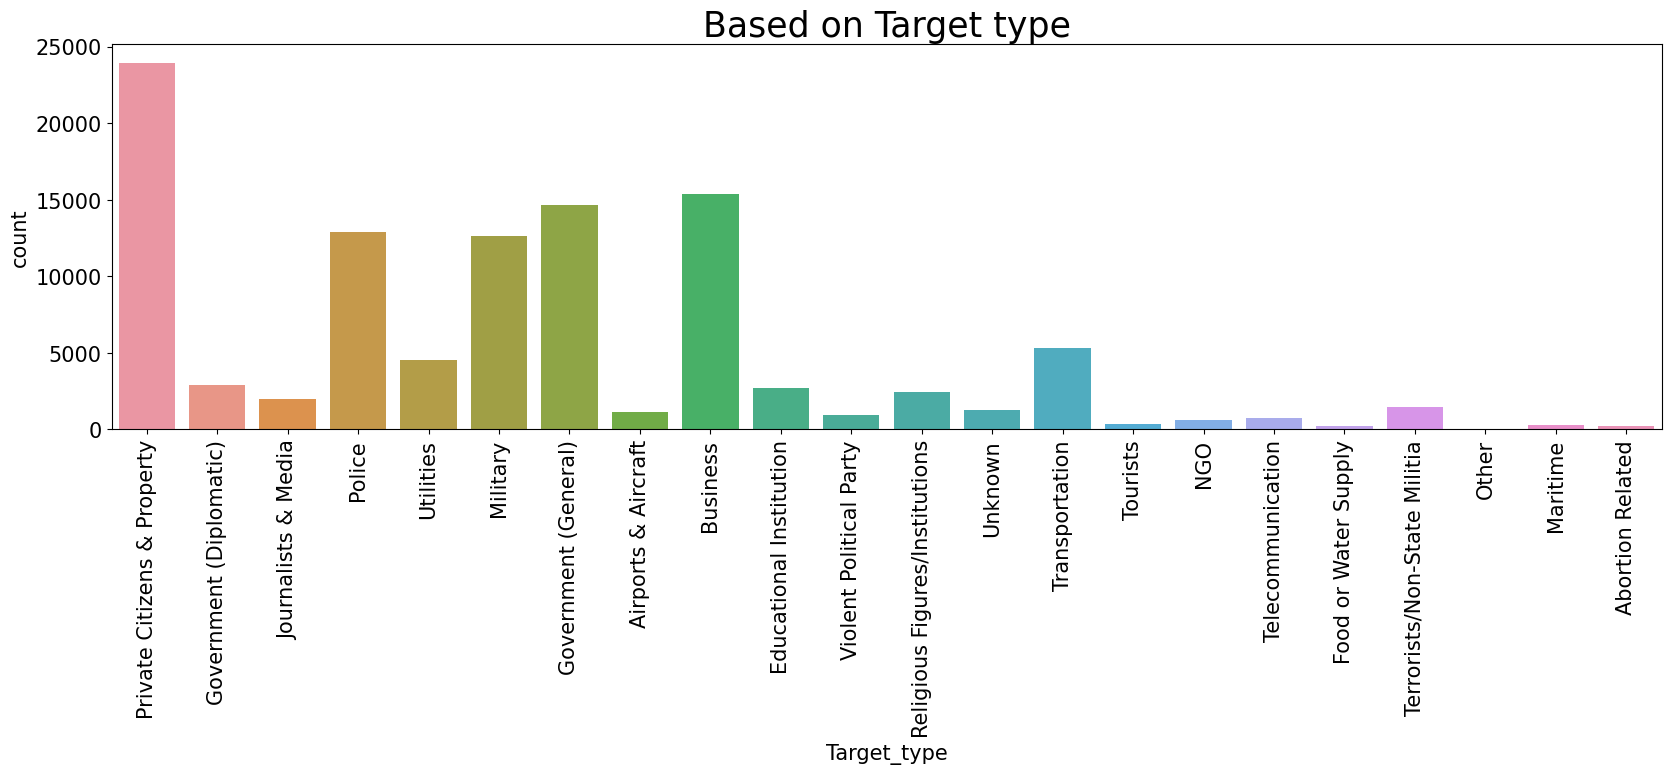

In [44]:
plt.figure(figsize=(20,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Target type', fontsize =25)
sns.countplot(x=terrorism_df.Target_type);

Attack based on attack type

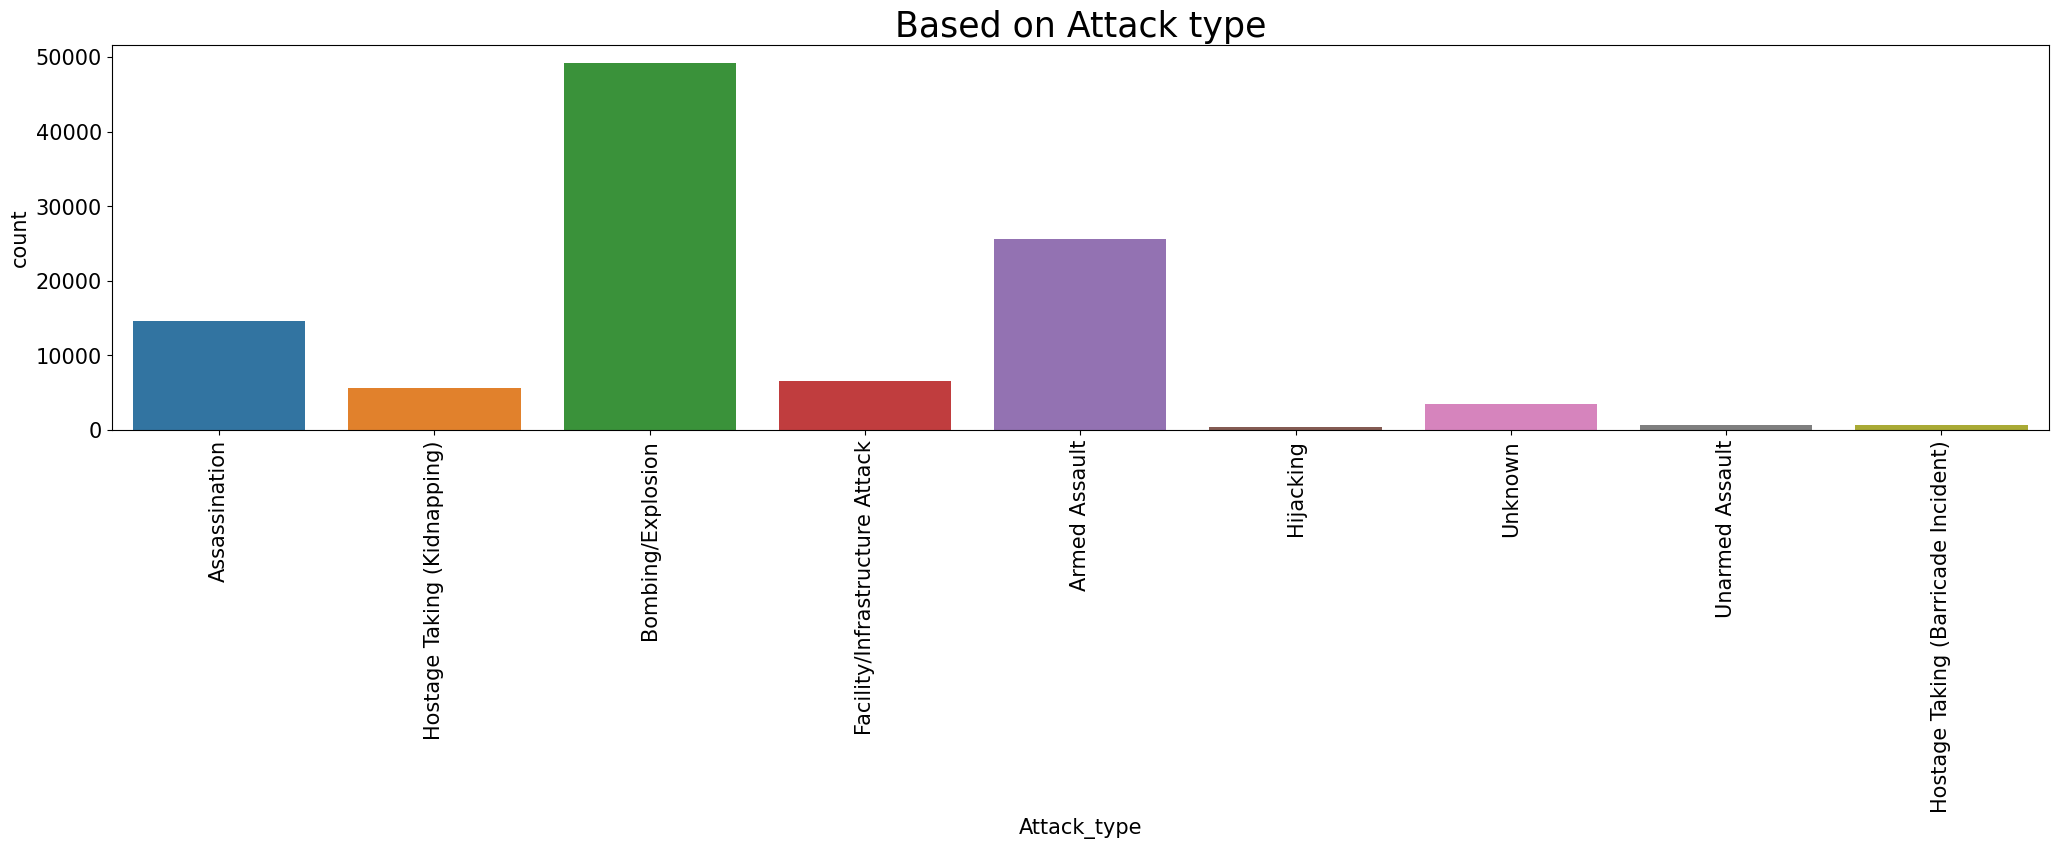

In [45]:
plt.figure(figsize=(25,5));
plt.rcParams.update({'font.size':15});
plt.xticks(rotation = 90)
plt.title('Based on Attack type', fontsize = 25)
sns.countplot(x=terrorism_df.Attack_type);

#### Result of Analysis

After observing different graphs, we obtained the following results:

Explosive : Most used weapon type in attacks

2014 : Most number of attacks year

5th month(May) : Most number of attacks month

15th day of month : Most number of attacks day

Iraq : Most attacked country

Baghdad : Most attacked State

Middle East and North America : Most attacked region

Private Citizens and Property : Most attack based on target type

Bombing /Explosion : Most attack based on attack type